In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataset/customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df["InternetService"]=df["InternetService"].fillna("")


In [7]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
num_df =df.select_dtypes(include=["number"])
num_df

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [12]:
corr=num_df.corr()

<Axes: >

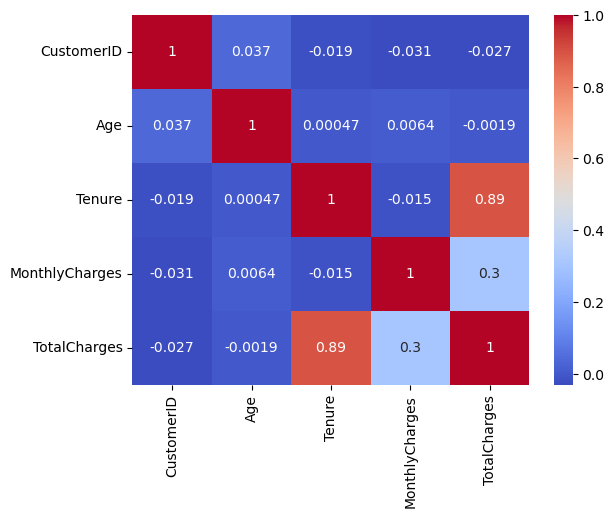

In [13]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [14]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


Text(0.5, 1.0, 'Churn (Yes/NO')

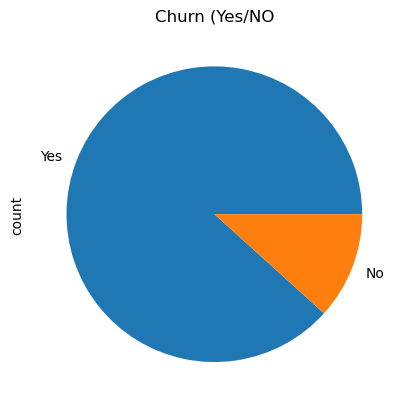

In [15]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/NO")


In [16]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [18]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

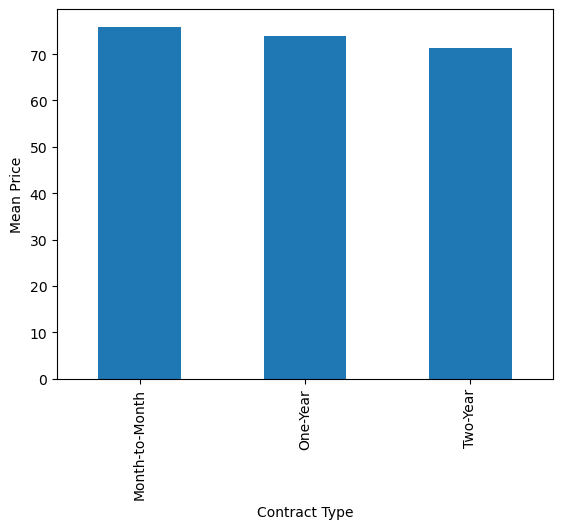

In [19]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.show()

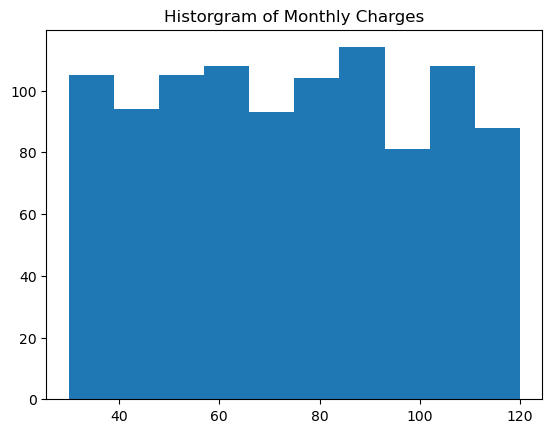

In [20]:
plt.hist(df["MonthlyCharges"])
plt.title("Historgram of Monthly Charges")
plt.show()

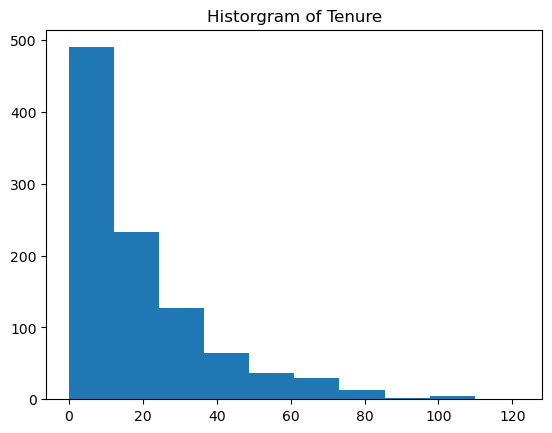

In [21]:
plt.hist(df["Tenure"])
plt.title("Historgram of Tenure")
plt.show()

## Feature Engineering

In [22]:
y = df["Churn"]
X= df[["Age","Gender","Tenure","MonthlyCharges"]]
 

In [23]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01


In [24]:
X["Gender"]=X["Gender"].apply(lambda x:1 if x =="Female"else 0)


C:\Users\Mike\AppData\Local\Temp\ipykernel_12420\2922844647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=X["Gender"].apply(lambda x:1 if x =="Female"else 0)


In [25]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [26]:
y=y.apply(lambda x:1 if x == "Yes" else 0) 
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Churn, dtype: int64

In [27]:
y.value_counts()

Churn
1    883
0    117
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

# def classify(model):
#     X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)
#     model.fit(X_train,y_train)
#     print("Accuracy:",model.score(X_test,y_test))


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [30]:
import joblib

joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [31]:
X_test = scaler.fit_transform(X_test)

In [32]:
X_test

array([[ 0.56666473, -1.12055303, -0.66525042,  0.64269736],
       [ 0.16453719, -1.12055303, -0.71958615, -1.41935735],
       [ 1.16985605, -1.12055303, -0.33923606,  0.69406663],
       ...,
       [ 0.0640053 ,  0.89241649, -0.55657897, -0.87116285],
       [-1.14237733, -1.12055303, -1.04560051, -1.30166804],
       [ 0.96879227,  0.89241649,  3.02957904, -1.66393643]])

In [33]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuraccy score on model is {}".format(accuracy_score(y_test,predictions)))
    

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [35]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred= log_model.predict(X_test)
modelperformance(y_pred)

Accuraccy score on model is 0.86


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
param_grid={
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
}

In [39]:
gridkn= GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [40]:
gridkn.fit(X_train,y_train)
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [41]:
modelperformance(y_pred)

Accuraccy score on model is 0.86


In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC()
param_grid ={
    "C":[0.01,0.1,0.5,1],
    "kernel":['linear','rbf','poly']
}



In [44]:
gridsvc = GridSearchCV(svm,param_grid,cv = 5)

In [45]:
gridsvc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [46]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [47]:
modelperformance(y_pred)

Accuraccy score on model is 0.86


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
params_grid = {
    "criterion":["gini", "entropy"],
    "splitter":["best","random"],
    "max_depth":[None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
}

In [59]:
grid_tree= GridSearchCV(DecisionTreeClassifier(),params_grid,cv=5)


In [60]:
grid_tree.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [61]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [62]:
y_pred = grid_tree.predict(X_test)

In [63]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], d

In [65]:
modelperformance(y_pred)

Accuraccy score on model is 0.8433333333333334


In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier()


In [82]:
params_grid={
    "n_estimators":[16,32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [83]:
grid_rfc = GridSearchCV(rfc_model,params_grid,cv=5)


In [84]:
grid_rfc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [16, 32, 64, 128, 256]})

In [85]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [86]:
y_pred=grid_rfc.predict(X_test)

In [87]:
modelperformance(y_pred)

Accuraccy score on model is 0.8433333333333334


In [ ]:
gbest model 